In [ ]:
pip install mpld3
pip install seaborn==0.11.0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import datetime as dt

In [459]:
chunk_list=[]
for chunk in pd.read_csv('yellow_tripdata_2020-06.csv', chunksize=10000):
    chunk_list.append(chunk[(pd.to_datetime(chunk['tpep_pickup_datetime']) < pd.to_datetime('2020-06-22')) & (chunk['payment_type']==1)])

final_df = pd.concat(chunk_list)


# 2. Data Understanding

In [576]:
# Quick stats to get an understanding of the data
print('shape:',final_df.shape) #Shows the dimension of the dataframe
final_df.describe() #Gives the summary statistics for the numerical values 


shape: (196701, 18)


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000,196701.0,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000,196701.000000
mean,1.584974,1.341137,2.951369,1.050615,162.057824,156.839477,1.0,12.452777,1.169812,0.496484,2.757391,0.262722,0.299771,18.764058,2.180759
std,0.492728,1.004871,3.679225,1.067875,68.302024,73.253976,0.0,11.321017,1.279300,0.041810,2.998209,1.439310,0.008336,13.618888,0.834419
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,-31.000000,0.000000,-0.500000,-36.300000,0.000000,-0.300000,-70.600000,-2.500000
25%,1.000000,1.000000,1.060000,1.000000,113.000000,90.000000,1.0,6.500000,0.000000,0.500000,1.550000,0.000000,0.300000,11.630000,2.500000
50%,2.000000,1.000000,1.830000,1.000000,161.000000,158.000000,1.0,9.000000,0.500000,0.500000,2.250000,0.000000,0.300000,14.760000,2.500000
75%,2.000000,1.000000,3.290000,1.000000,236.000000,234.000000,1.0,14.000000,2.500000,0.500000,3.220000,0.000000,0.300000,20.380000,2.500000
max,2.000000,9.000000,259.130000,99.000000,265.000000,265.000000,1.0,534.000000,7.000000,0.500000,422.680000,50.740000,0.300000,690.050000,2.500000


## Visualizing the variables

In [308]:
vis_subset = final_df.query('passenger_count > 0 & trip_distance > 0&fare_amount>0&tip_amount>=0').sample(50000)

Text(0.5, 1.0, 'Fare amount vs Tip amount')

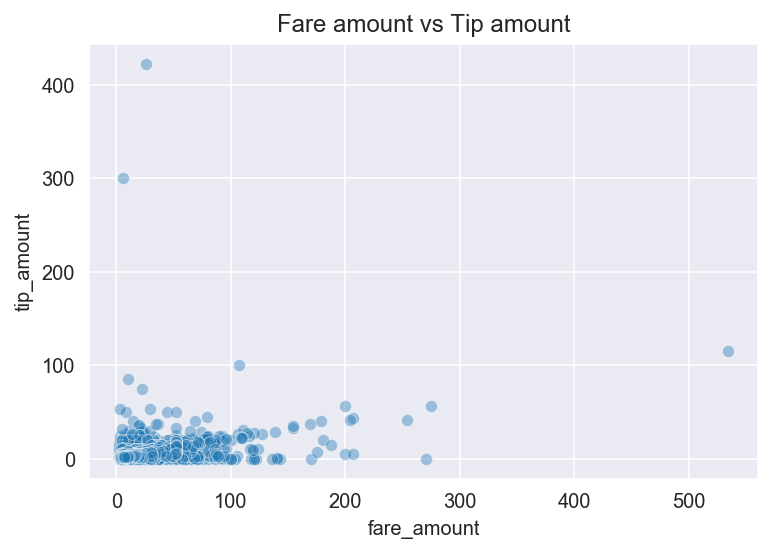

In [309]:
sns.scatterplot(x=vis_subset['fare_amount'],y=vis_subset['tip_amount'],alpha=0.4).set_title("Fare amount vs Tip amount")

Proportion of 0 tips: 0.059


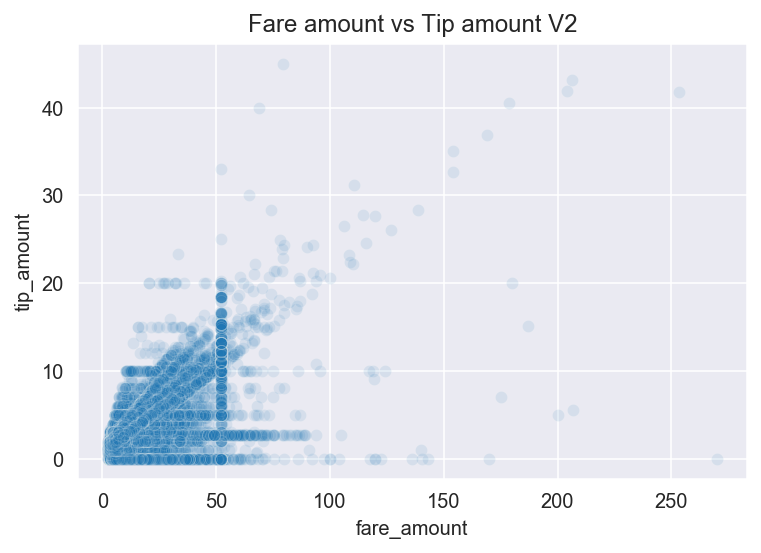

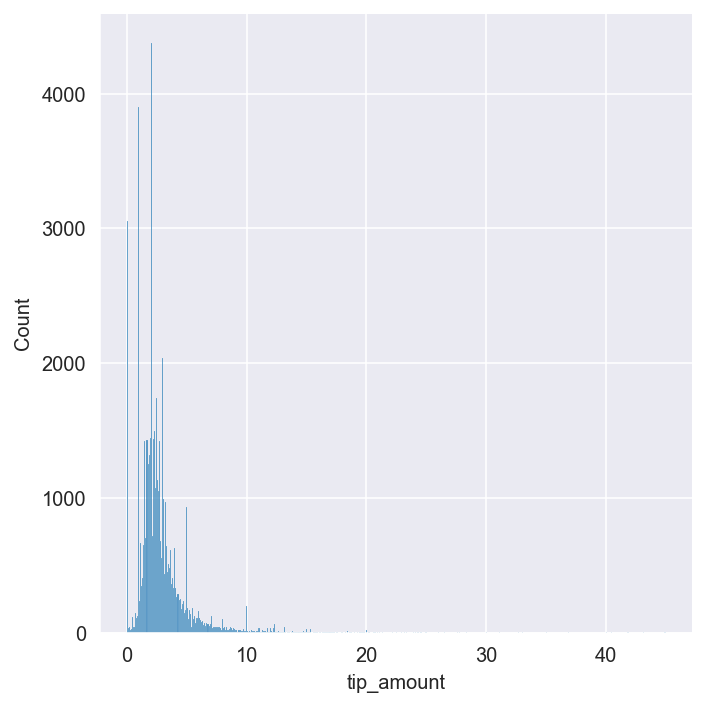

In [330]:
vis_subset = vis_subset.query('tip_amount<50 &tip_amount<fare_amount')#'tip_amount<50 &fare_amount<150'
sns.scatterplot(x=vis_subset['fare_amount'],y=vis_subset['tip_amount'],alpha=0.1).set_title("Fare amount vs Tip amount V2")
sns.displot(vis_subset['tip_amount'])
print("Proportion of 0 tips: "+ str(round(len(vis_subset.query('tip_amount==0'))/len(vis_subset),3)))

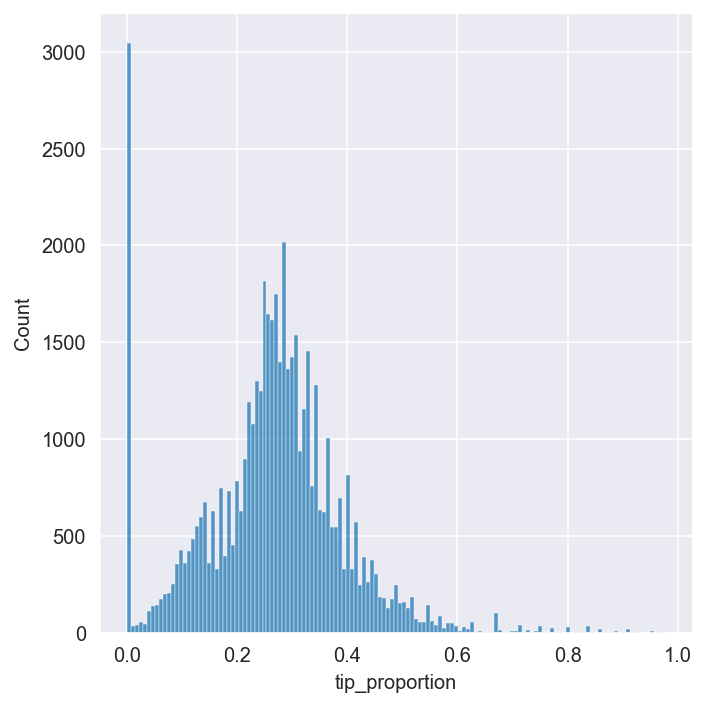

In [334]:
vis_subset['tip_proportion'] = vis_subset['tip_amount']/vis_subset1['fare_amount']
sns.displot(vis_subset['tip_proportion'])

,mean,count,std
RatecodeID,,,
1.0,0.266981,48875,0.128740
2.0,0.202170,540,0.082450
3.0,0.152142,46,0.091287
4.0,0.112196,40,0.103510
5.0,0.089214,108,0.107822


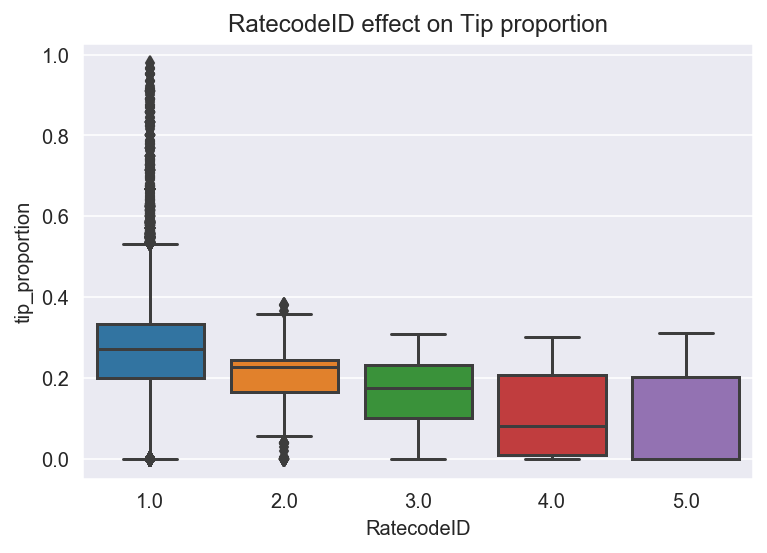

In [577]:
sns.boxplot(x=vis_subset['RatecodeID'],y=vis_subset['tip_proportion']).set_title("RatecodeID effect on Tip proportion")
vis_subset.groupby(['RatecodeID']).tip_proportion.agg(['mean','count','std'])

,mean,count,std
passenger_count,,,
1.0,0.265756,39807,0.128633
2.0,0.262356,5748,0.126842
3.0,0.271584,1427,0.136682
4.0,0.268826,468,0.130947
5.0,0.267801,1222,0.126978
6.0,0.268287,937,0.136022


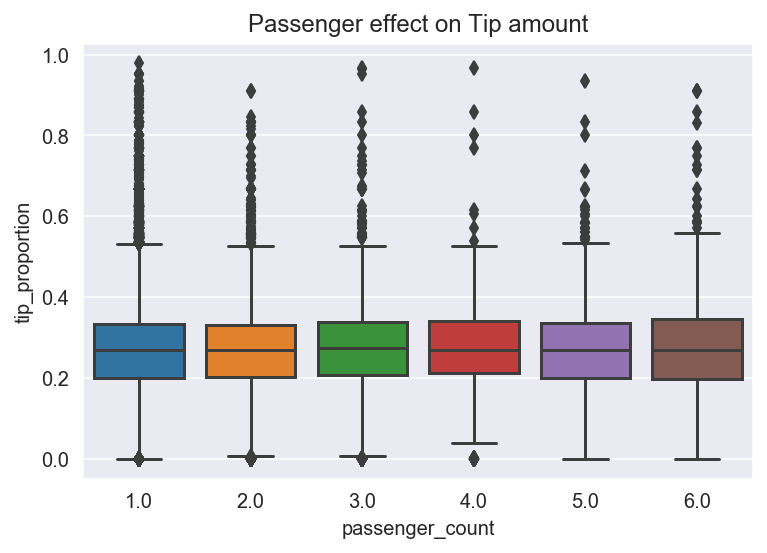

In [339]:
sns.boxplot(x=vis_subset['passenger_count'].astype('category'),y=vis_subset['tip_proportion']).set_title("Passenger effect on Tip proportion")
vis_subset.groupby(['passenger_count']).tip_proportion.agg(['mean','count','std'])

,mean,count,std
dow,,,
Friday,0.265698,8936,0.131326
Monday,0.264549,7528,0.128716
Saturday,0.258986,6615,0.128304
Sunday,0.261100,2420,0.125680
Thursday,0.265707,8300,0.127847
Tuesday,0.266679,7862,0.127206
Wednesday,0.272536,7948,0.129569


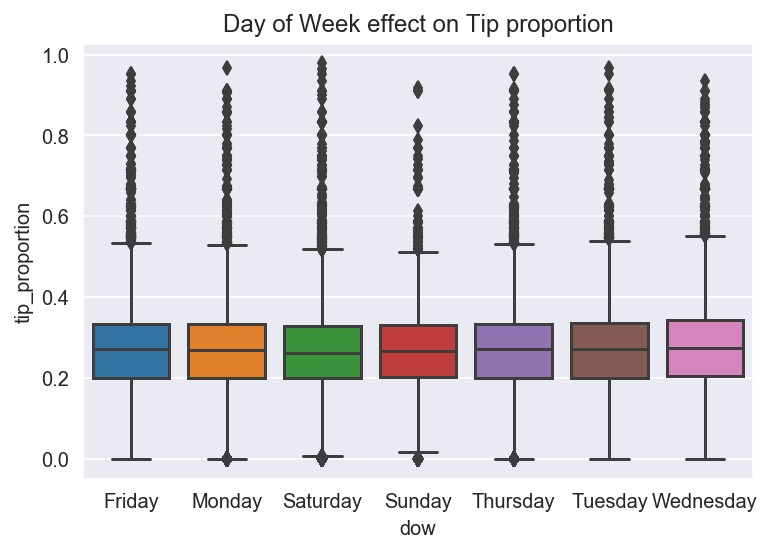

In [578]:
vis_subset['dow']=pd.to_datetime(vis_subset['tpep_pickup_datetime']).dt.day_name().astype('category') # creating the dow variable from datetime variable
sns.boxplot(x=vis_subset['dow'],y=vis_subset['tip_proportion']).set_title("Day of Week effect on Tip proportion")
vis_subset.groupby(['dow']).tip_proportion.agg(['mean','count','std'])

Text(0.5, 1.0, 'Time of Day effect on Tip amount')

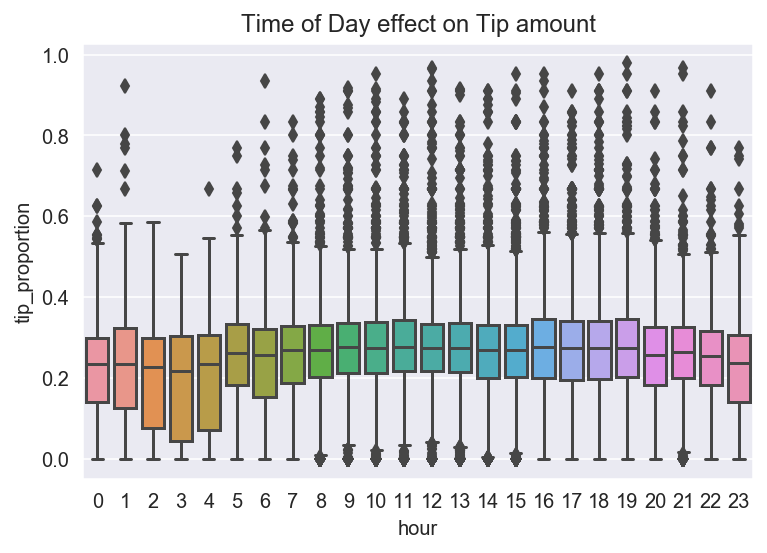

In [342]:
vis_subset['hour'] = pd.to_datetime(vis_subset['tpep_pickup_datetime']).dt.hour
sns.boxplot(x=vis_subset['hour'],y=vis_subset['tip_proportion']).set_title("Time of Day effect on Tip amount")

,mean,count,std
tow,,,
late_night,0.220398,989,0.149029
early_morning,0.256733,6692,0.124184
morning,0.274087,12368,0.124428
afternoon,0.267410,14823,0.128948
evening,0.267918,11877,0.131380
night,0.247255,2860,0.132696


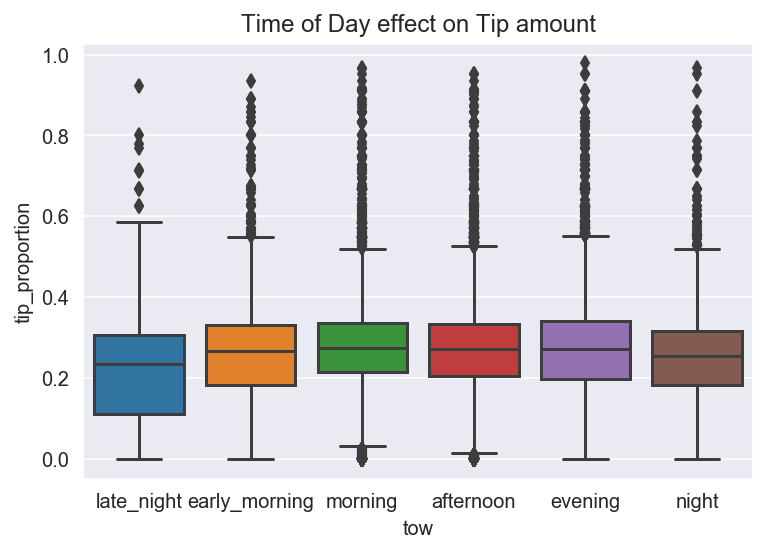

In [343]:
vis_subset['tow']= pd.cut(vis_subset['hour'], bins=[-1,4,8,12,16,20,24], labels=['late_night','early_morning','morning','afternoon','evening','night'])
sns.boxplot(x=vis_subset['tow'],y=vis_subset['tip_proportion']).set_title("Time of Day effect on Tip amount")
vis_subset.groupby(['tow']).tip_proportion.agg(['mean','count','std'])

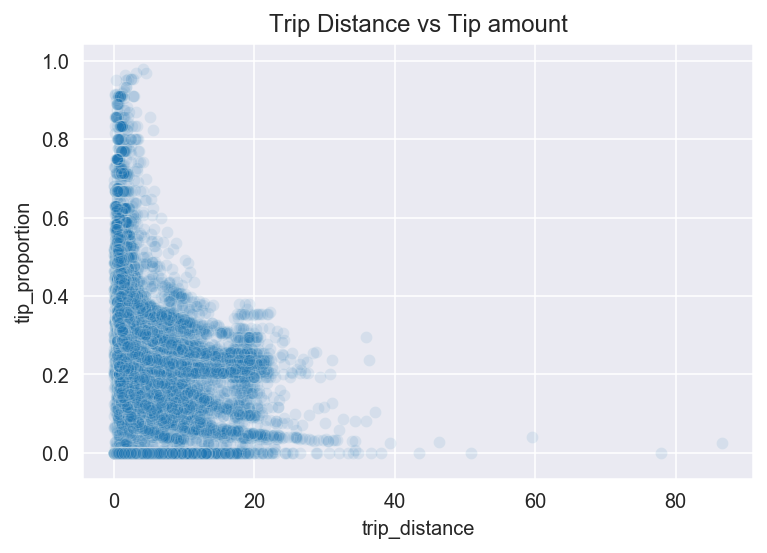

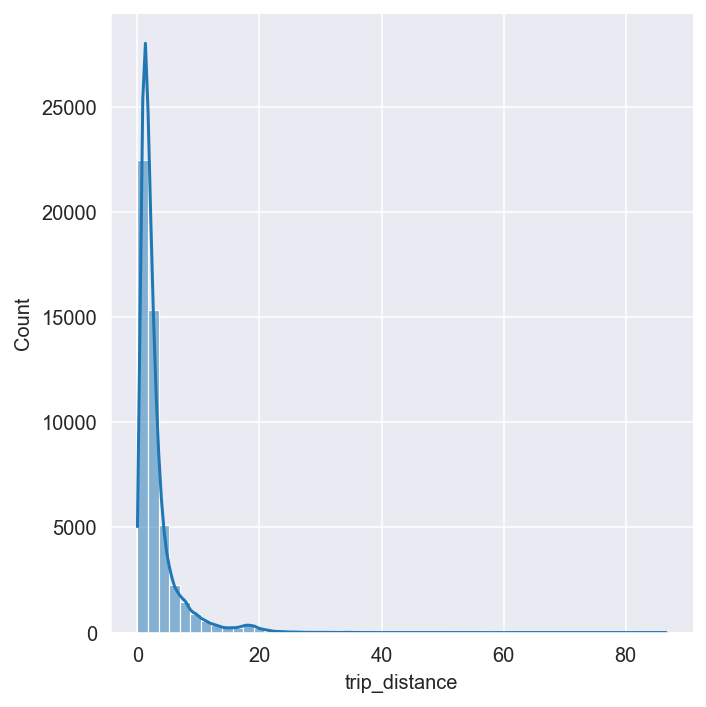

In [346]:
sns.scatterplot(x=vis_subset['trip_distance'],y=vis_subset['tip_proportion'],alpha=0.1).set_title("Trip Distance vs Tip amount")
sns.displot(vis_subset['trip_distance'],kde=True,bins=50)

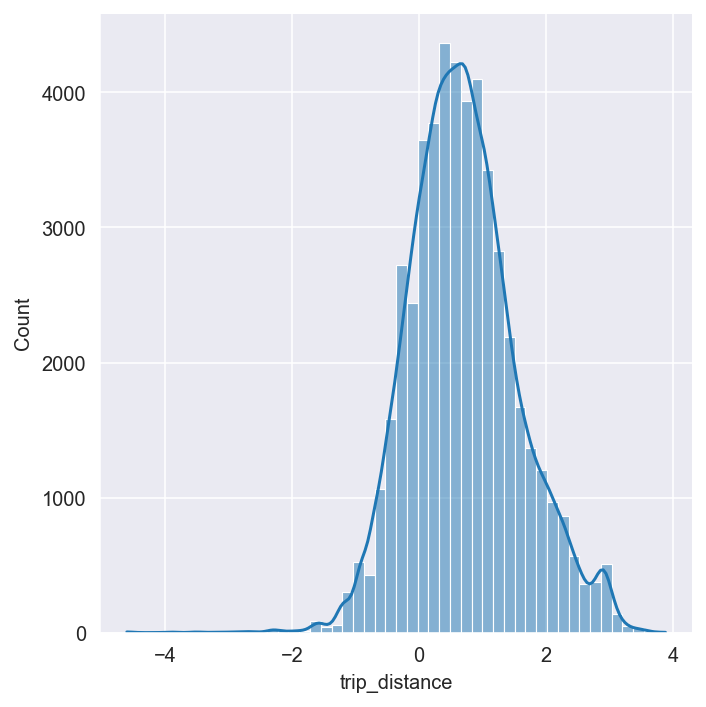

In [251]:
sns.displot(np.log(vis_subset['trip_distance']),kde=True,bins=50)

In [253]:
print(vis_subset['PULocationID'].value_counts().head(5))
print(vis_subset['DOLocationID'].value_counts().head(5))

#top20_pickup_df.groupby('PULocationID').agg({'tip_amount': ['mean', 'std']})

#Manhattan-Upper East Side North, Manhattan-Lenox Hill East, Manhattan-Upper East Side South

#print(vis_subset['DOLocationID'].value_counts().head(3)) #Manhattan-Upper East Side North, Manhattan-Lenox Hill East, Manhattan-Lenox Hill West

236    2416
237    2195
140    2167
141    2125
263    1970
Name: PULocationID, dtype: int64
236    2270
140    1816
237    1766
141    1736
75     1721
Name: DOLocationID, dtype: int64


# 3. Data Transformation

## 3.1 Select the Data

## 3.2 Select the Data

In [599]:
# Filter Data 
df3 = final_df.query('passenger_count>0&trip_distance>0&fare_amount>0&tip_amount>=0 & tip_amount<50&fare_amount<200')
df3 = df3[df3.notna()]

## 3.3 Construct Data

In [600]:
df3['dow']=pd.to_datetime(df3['tpep_pickup_datetime']).dt.day_name().astype('category')
df3['tow']= pd.cut(pd.to_datetime(df3['tpep_pickup_datetime']).dt.hour, bins=[-1,4,8,12,16,20,24], labels=['late_night','early_morning','morning','afternoon','evening','night'])
df3['trip_length_mins']=(pd.to_datetime(df3['tpep_dropoff_datetime'])-pd.to_datetime(df3['tpep_pickup_datetime'])).dt.total_seconds()/60
df3['tip_proportion']=df3['tip_amount']/df3['fare_amount']

## 3.4 Integrate Various Sources

In [601]:
location_df = pd.read_csv('taxi+_zone_lookup.csv')
print(location_df.head()) #Location look up data set -> matching LocaitonID with PULocaitonID and DOLocationID to get the Borough
location_df = location_df.drop(['Zone','service_zone'],axis=1)

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [602]:
location_df.columns = ['PULocationID', 'PUBorough']
df3 = df3.merge(location_df,  how ='left')
location_df.columns = ['DOLocationID', 'DOBorough']
df3 = df3.merge(location_df,  how ='left')

# 4 Data Transformation

In [603]:
# Picking what variables to drop based on logic and exploratory analysis outlined earlier
df3 = df3.drop(['VendorID','payment_type', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge','store_and_fwd_flag','tpep_dropoff_datetime'],axis=1)

In [604]:
# Log transform trip distance based on exploratory then remove old variable
df3['trip_distance_logged'] =  np.log(df3['trip_distance'])
df3 = df3.drop(['trip_distance'],axis=1)

# 5 Data-mining Method Selection

In [469]:
df3

,tpep_pickup_datetime,passenger_count,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,dow,tow,trip_length_mins,tip_proportion,PUBorough,DOBorough,trip_distance_logged
0,2020-06-01 00:31:23,1.0,1.0,140,68,15.5,4.00,Monday,late_night,18.583333,0.258065,Manhattan,Manhattan,1.280934
1,2020-06-01 00:42:50,1.0,1.0,79,226,19.5,2.00,Monday,late_night,21.716667,0.102564,Manhattan,Queens,1.722767
2,2020-06-01 00:16:41,1.0,1.0,186,75,14.5,3.65,Monday,late_night,12.816667,0.251724,Manhattan,Manhattan,1.481605
3,2020-06-01 00:15:04,1.0,1.0,186,234,6.0,2.94,Monday,late_night,4.533333,0.490000,Manhattan,Manhattan,0.207014
4,2020-06-01 00:08:48,2.0,2.0,132,113,52.0,13.82,Monday,late_night,32.000000,0.265769,Queens,Manhattan,2.944439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183854,2020-06-21 23:04:52,1.0,1.0,48,48,5.0,5.00,Sunday,night,3.966667,1.000000,Manhattan,Manhattan,-0.415515
183855,2020-06-21 23:46:12,1.0,1.0,41,24,4.5,0.00,Sunday,night,3.200000,0.000000,Manhattan,Manhattan,-0.544727
183856,2020-06-21 23:51:21,1.0,1.0,141,233,6.5,1.00,Sunday,night,4.033333,0.153846,Manhattan,Manhattan,0.518794
183857,2020-06-21 23:57:14,1.0,1.0,186,4,13.0,3.36,Sunday,night,14.750000,0.258462,Manhattan,Manhattan,1.232560


# 6 Data Mining Algorithm Selection

In [605]:
train = df3[pd.to_datetime(df3['tpep_pickup_datetime']) < pd.to_datetime('2020-06-14')]
test = df3[pd.to_datetime(df3['tpep_pickup_datetime']) > pd.to_datetime('2020-06-14')]
X_train = train.drop(['tip_proportion','dow','tow','PUBorough','DOBorough','tip_amount','fare_amount','tpep_pickup_datetime','RatecodeID','PULocationID','DOLocationID'],axis=1).values
X_test = test.drop(['tip_proportion','dow','tow','PUBorough','DOBorough','tip_amount','fare_amount','tpep_pickup_datetime','RatecodeID','PULocationID','DOLocationID'],axis=1).values
y_train = train['tip_proportion'].values
y_test = test['tip_proportion'].values

array([[-0.38634867,  0.36203233,  0.09709497,  0.6687735 ],
       [-0.38634867,  0.75777825,  0.15418496,  1.18170558],
       [-0.38634867,  0.26309585, -0.0079749 ,  0.90173594],
       ...,
       [-0.38634867,  0.06522289,  0.00386824,  0.55003603],
       [-0.38634867, -0.528396  , -0.12336955, -0.55923545],
       [-0.38634867, -0.62733248, -0.1859256 , -0.57796036]])

In [606]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model

# Further scaling for random forest compatibility 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest model
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10621375630571152
Mean Squared Error: 0.03346067313097483
Root Mean Squared Error: 0.1829225878096383


In [607]:
fi = pd.DataFrame({'feature': list(df3.drop(['tip_proportion','dow','tow','PUBorough','DOBorough','tip_amount','fare_amount','tpep_pickup_datetime','RatecodeID','PULocationID','DOLocationID'],axis=1).columns),
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
1,trip_length_mins,0.550973
2,trip_distance_logged,0.380032
0,passenger_count,0.068995


In [608]:

# Linear regression model
clf = linear_model.LinearRegression()
clf.fit (X_train, y_train)

y_pred = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08737319950670654
Mean Squared Error: 0.02847756845323631
Root Mean Squared Error: 0.1687529805758592


In [609]:
fi = pd.DataFrame({'feature': ['intercept']+list(train.drop(['tip_proportion','dow','tow','PUBorough','DOBorough','tip_amount','fare_amount','tpep_pickup_datetime','RatecodeID','PULocationID','DOLocationID'],axis=1).columns),
                   'coef': [clf.intercept_]+list(clf.coef_)})
fi

,feature,coef
0,intercept,0.273782
1,passenger_count,0.000642
2,trip_length_mins,-0.001027
3,trip_distance_logged,-0.055611


In [610]:
baseline = [y_train.mean()]*len(y_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, baseline))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, baseline))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, baseline)))

Mean Absolute Error: 0.0966962166267021
Mean Squared Error: 0.029976580286659435
Root Mean Squared Error: 0.1731374606682778


# 8 Data Mining Method

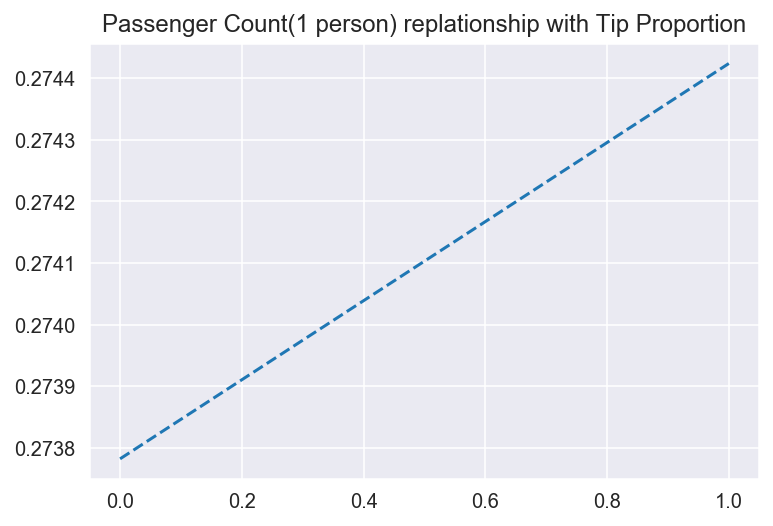

In [627]:
def abline(slope, intercept,title):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    plt.title(title)

    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
abline(0.000642,0.273782,'Passenger Count(1 person) replationship with Tip Proportion')


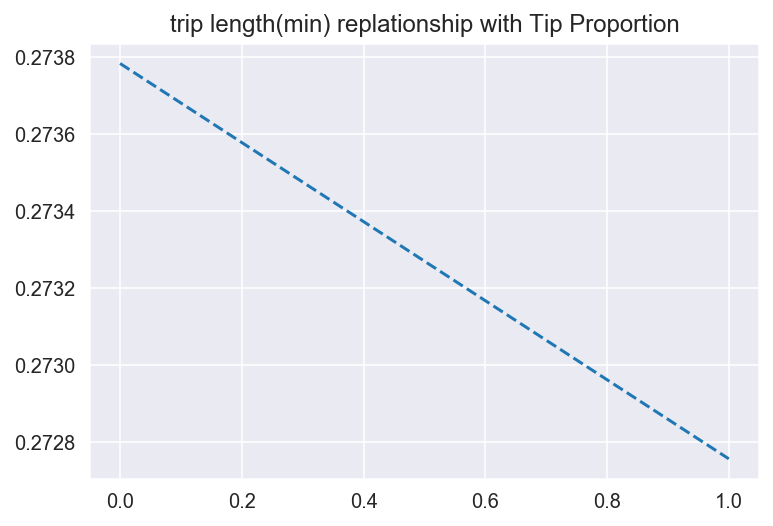

In [628]:
abline(-0.001027,0.273782,'trip length(min) replationship with Tip Proportion')


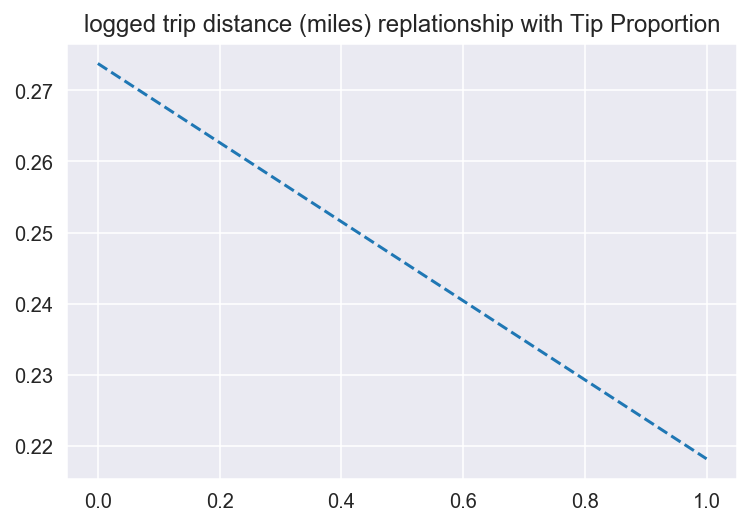

In [629]:
abline(-0.055611,0.273782,'logged trip distance (miles) replationship with Tip Proportion')

# Random

In [572]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client
import dask
import dask.dataframe as dd
dask_df = dd.read_csv('yellow_tripdata_2020-06.csv',dtype={'RatecodeID': 'float64',
       'VendorID': 'float64',
       'passenger_count': 'float64',
       'payment_type': 'float64'})
#df1 = dask_df.query('passenger_count > 0 & trip_distance > 0&fare_amount>0&tip_amount>=0')
count=dask_df.shape[0]
mean=dask_df['tip_amount'].mean()
std=dask_df['tip_amount'].std()

C:\Users\Matthew\anaconda3\lib\site-packages\distributed\dashboard\core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [573]:
agg = [count.compute(),mean.compute(),std.compute()]

In [574]:
agg

[549760, 1.7629042673166477, 2.631494808019484]